<a href="https://colab.research.google.com/github/timlok123/PHYS3151-Machine-Learning-in-Physics-2025/blob/main/prinicipal-components-analysis/principal-component-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

The objective of PCA is to reduce problems with high dimension to a problem with lower dimention. To do this, one can simply drop components which are less important to the problem, but that would ignore the information from those components which is undesirable. Instead, one can make a set of new components which is weighed by the significance of the original components. This also reduces the dimesion of the problem, but loses less information.

## Example 1

Data source:https://archive.ics.uci.edu/ml/datasets/Wine
<br>These data are the results of a chemical analysis of wines grown in the same region in Italy.

### Data Import

Like all other machine learning tasks, the first step is to import the data.

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
!git clone https://github.com/timlok123/PHYS3151-Machine-Learning-in-Physics-2025

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2025'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 167 (delta 80), reused 38 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (167/167), 11.26 MiB | 6.93 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [2]:
df = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2025/prinicipal-components-analysis/principal-component-analysis-example-1.csv", sep=",")
print (df)

     Type  Alcohol  Malic-Acid   Ash  Alcalinity  Magnesium  Total-Phenols  \
0       1    14.23        1.71  2.43        15.6        127           2.80   
1       1    13.20        1.78  2.14        11.2        100           2.65   
2       1    13.16        2.36  2.67        18.6        101           2.80   
3       1    14.37        1.95  2.50        16.8        113           3.85   
4       1    13.24        2.59  2.87        21.0        118           2.80   
..    ...      ...         ...   ...         ...        ...            ...   
173     3    13.71        5.65  2.45        20.5         95           1.68   
174     3    13.40        3.91  2.48        23.0        102           1.80   
175     3    13.27        4.28  2.26        20.0        120           1.59   
176     3    13.17        2.59  2.37        20.0        120           1.65   
177     3    14.13        4.10  2.74        24.5         96           2.05   

     Flavanoids  Nonflavanoid-phenols  Proanthocyanins  Color-I

Since PCA only deals with the 'X' component of the data, the 'y' component can be set aside since it is not important for PCA.

In [3]:
X = df.drop(columns=['Type'])
y = df['Type']

### Data Preprocessing

Before applying PCA, one must do data preprocessing: normalization and feature scaling.

In [4]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=list(X.columns.values))
print(X_scaled.shape)
print(scaler)

(178, 13)
RobustScaler()


In [5]:
X = X_scaled

### PCA Implementation

In this example, we just use PCA from sklearn package.

For demonstration, take that this data can be adequately represented with only 3 dimensions, which is probably not the case, but 3 dimensions make it easy to plot.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalX = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
finalX = pd.concat([principalX, y], axis = 1)

In [7]:
pca.explained_variance_ratio_

array([0.32853032, 0.19681405, 0.12684328])

Since usually we don't want to lose so much information when we reduce dimension, so we see how well the information is kept in the dimension reduction by looking at the variance_riatio, which means percentage of variance explained by each of the selected components. The larger the ratio is, the more important is the component.

<br>Then, we look at the total variance kept.

In [ ]:
import numpy as np
print('In this case, the total variance preserved is', 100*np.sum(pca.explained_variance_ratio_),'% of the original dataset')

In this case, the total variance preserved is 65.21876534446807 % of the original dataset


As one can imagine, reducing your data from 13 columns down to 3 can be pretty bad in terms of information loss.

As is our purpose, we plot our dimensionally reduced data.

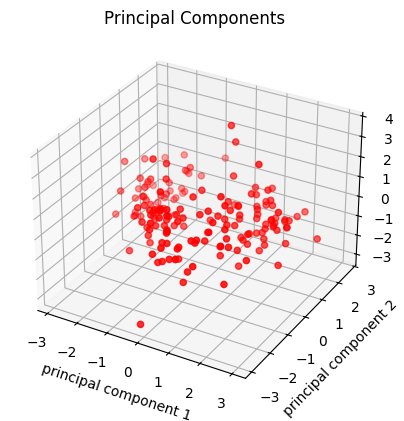

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(projection='3d')

x =principalX['principal component 1']
y =principalX['principal component 2']
z =principalX['principal component 3']

ax.scatter(x, y, z, c='r', marker='o')
ax.set_title('Principal Components')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')

plt.show()

Next, since the variance is largely lost in the trial above, let's try a less aggressive reduction of 13 dimensions to 10.

In [ ]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalX = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10'])
finalX = pd.concat([principalX, y], axis = 1)
pca.explained_variance_ratio_

array([0.32853032, 0.19681405, 0.12684328, 0.07788489, 0.06968107,
       0.05607506, 0.04809657, 0.02541638, 0.02091117, 0.01754752])

In [ ]:
print('In this case, the total variance preserved is', 100*np.sum(pca.explained_variance_ratio_),'% of the original dataset')

In this case, the total variance preserved is 96.78003160463805 % of the original dataset


This reduction is much better in terms of data loss because it reduces the dataloss to less than 3.5% of the original variance.

In principal-component-analysis, we need to choose the number of principal components ourselves and information loss is always important for us to consider, so that we can plot the correspondence between the variance kept and the dimension to which the initial data is reduced.

In [ ]:
dimensions = []
variance = []
for i in range(13):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X)
    principalX = pd.DataFrame(data = principalComponents)
    ratio = np.sum(pca.explained_variance_ratio_)
    dimensions.append(i)
    variance.append(ratio)

Text(0.5, 1.0, 'Dimensions vs variance')

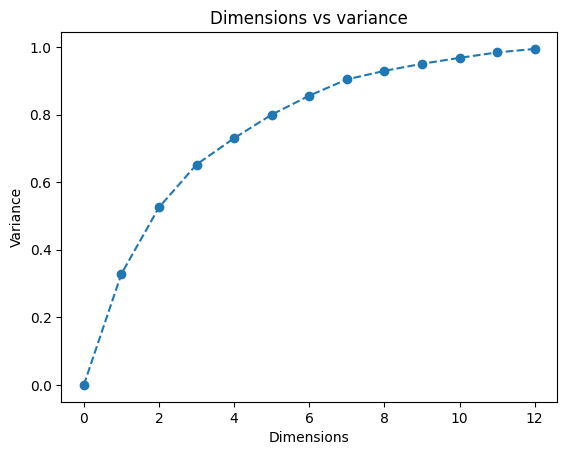

In [ ]:
plt.plot(dimensions,variance,marker='o',ls='--')
plt.xlabel("Dimensions")
plt.ylabel("Variance")
plt.title("Dimensions vs variance")

As you can see, PCA represents a trade-off between information kept (variance) and computational complexity (dimensions). You can either keep most of the variance in your data, but your computations (such as regression) take very long to run. But if you choose to use much fewer dimensions, the variance in your data will decrease.

When we are tring to find the correspondence of variance and dimensions, we can also set the minimum variance of the principal components and then get the proper dimension, using the same function.

In [ ]:
pca = PCA(n_components=0.98)
pca.fit(X)
print (pca.explained_variance_ratio_)
print ('Dimensions should be:',pca.n_components_)

[0.32853032 0.19681405 0.12684328 0.07788489 0.06968107 0.05607506
 0.04809657 0.02541638 0.02091117 0.01754752 0.01609249]
Dimensions should be: 11


## Example 2

As with all previous notebooks, the second example uses an algorithm written from scratch (as opposed to sklearn) to better unpack the mechanism behind.

Data source:https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29
<br>Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data.
    
 <br>First, import the data and have a look.

### Data Preparation

In [ ]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

#df = pd.read_csv("asset/csv/breast-cancer-wisconsin.csv", sep=",")
df = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2025/prinicipal-components-analysis/principal-component-analysis-example-2.csv", sep=",")

print(df)

          id  thickness  cell-size  cell-shape  marginal-adhesion  \
0    1000025          5          1           1                  1   
1    1002945          5          4           4                  5   
2    1015425          3          1           1                  1   
3    1016277          6          8           8                  1   
4    1017023          4          1           1                  3   
..       ...        ...        ...         ...                ...   
694   776715          3          1           1                  1   
695   841769          2          1           1                  1   
696   888820          5         10          10                  3   
697   897471          4          8           6                  4   
698   897471          4          8           8                  5   

     single-cell-size bare-nuclei  bland-chromatin  normal-nucleoli  mitoses  \
0                   2           1                3                1        1   
1          

We notice that the first column is an id column, which is not relevant to our data, so we first remove it from the dataset.

In [ ]:
df.drop(columns=['id'],inplace=True)

Now, in this dataset, the response value vector 'y' is actually called 'class', and represents whether the cancerous cell is malignant or benign.

In [ ]:
X = df.drop(columns=['class'])
y = df['class']

In this dataset, instead of having simple 'NaN' to deal with, all the unknown values are represented with '?', so to use the same implementation as in the logistic regression notebook, we must first replace all the '?' with 'NaN'.

In [ ]:
X = np.where(X=='?', float('NaN'), X)

Then, we can use the same implementation to change all the NaN values into randomly selected values from the same column.

In [ ]:
import random
X = pd.DataFrame(data = X, columns = df.drop(columns=['class']).columns.values)
X = X.apply(lambda x: x.fillna(random.choice(x.dropna())), axis=1)

/usr/lib/python3.11/random.py:374: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return seq[self._randbelow(len(seq))]
<ipython-input-23-bc9ffe056180>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.apply(lambda x: x.fillna(random.choice(x.dropna())), axis=1)


Before PCA, we need data preprocessing.

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=list(X.columns.values))
print(X_scaled.shape)
print(scaler)

(699, 9)
RobustScaler()


In [ ]:
X = X_scaled

### Covariance Matrix

The first step in PCA is establishing the covariance matrix of the design matrix.

In [ ]:
cov = np.cov(X,rowvar=False)

Here, the cov function from the numpy package is used, functionally it is exactly the same as performing the operation 'manually' using the numpy matrix operations. A covariance matrix is the matrix $X^T X$. However it is slightly easier to simply use the numpy function since it reduces the step of having to convert the pandas dataframe into a numpy array. The covariance matrix shows whether the features are positively correlated (postive $C_{ij}$) or negatively correlated (negative $C_{ij}$). And since the features are regularized, it also shows how strongly correlated they are (The greater $|C_{ij}|$ is the more strongly correlated the features are.)

### Singular Value Decomposition

After getting the covariance matrix, we want to get its eigenvectors.Here, we use svd.
<br>For the svd here: $$covariance\ matirx = U.S.V^*$$
<br>S is a diagonal matrix and U is a unitary matrix whose columns are exactly the u vectors we want.  Actually, u vectors signify the new planes to which we will project our data sample.<br> <br>Therefore, to reduce a system from n-dimensions to k-dimensions, just take the first k-vectors from U (first k columns).

In [ ]:
from numpy import linalg as la
U,sigma,VT=la.svd(cov)
print(sigma)
print(U.shape)
#print(U)

[5.43152911 1.7154467  0.45061116 0.39583016 0.32690645 0.2153644
 0.17540671 0.16197122 0.05060171]
(9, 9)


### Principal Components

To get the reduced system is to transform every x of example in design matrix X into z, which is: X_reduced=X.U_reduced (X: 699 x 9,U_reduced: 9 x Dimension, X_reduced: 699 x Dimension).
<br>So we design a function here to get the reduced system and also show the ratio of information(variance) kept.

In [ ]:
def reduce_system(U,dimension):
    U_reduced=U[ : , :dimension]
    reduced_vec=np.dot(X,U_reduced)
    var=np.sum(sigma[:dimension])/np.sum(sigma[:])
    return reduced_vec,var

### Variance vs Reduced Dimension

Once again, we can plot the variance loss against the dimensions as in the first example.

In [ ]:
dimensions = []
variance = []
for i in range(10):
    reducevec, vari = reduce_system(U,i)
    dimensions.append(i)
    variance.append(vari)

Text(0.5, 1.0, 'Dimensions vs variance')

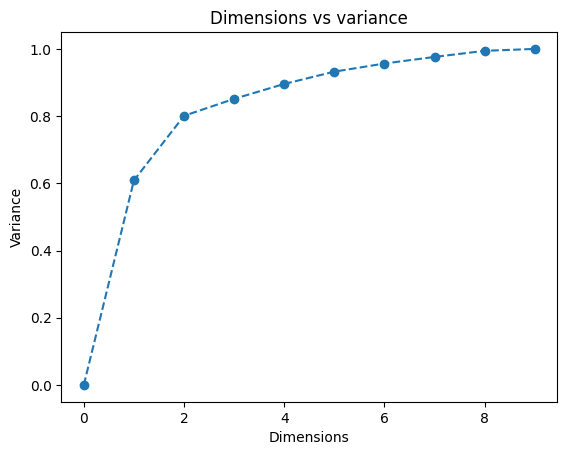

In [ ]:
plt.plot(dimensions,variance,marker='o',ls='--')
plt.xlabel("Dimensions")
plt.ylabel("Variance")
plt.title("Dimensions vs variance")

Now, because the total number of dimensions of this is lower, the curve is more jagged, but the inverse exponential curve is clear. In datasets with very large amounts of dimensions, using PCA can reduce a huge amount of dimensions without too much loss of information.

### Comparison with Initial Data

Since we have gone through all the trouble of doing principal component analysis, we should at least put the data through it's paces and see the effect of PCA. So we now compare doing SVM classification on both the un-PCA-ed data and the PCA-ed data.

Firstly, we do SVM using the complete dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[134   1]
 [  4  71]]
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       135
           4       0.99      0.95      0.97        75

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210



Using the original dataset, we have misclassifications whose number is the sum of antidiagonal of the confusion matrix.

Next, we test our reduced system. To clearly show the difference according to the figure above, here we give an example of 1-dimension. Before implementing svm ,we can reshape X_reduced in a form similar to the initial data.

In [ ]:
reducedvec, var=reduce_system(U,1)
X_pca=reducedvec
y = y.to_numpy()
y = y.reshape((len(y),1))
print(X_pca.shape)
df_pca = np.append(X_pca,y,axis=1)
df_pca = pd.DataFrame(data = df_pca, columns = ['principal component 1','class'])
print(df_pca)

(699, 1)
     principal component 1  class
0                -0.049210    2.0
1                -2.351006    2.0
2                 0.005031    2.0
3                -2.062122    2.0
4                -0.207447    2.0
..                     ...    ...
694              -0.014931    2.0
695               0.271724    2.0
696              -4.574040    4.0
697              -2.634439    4.0
698              -2.880885    4.0

[699 rows x 2 columns]


In [ ]:
X1 = df_pca.drop(columns='class')
y1 = df_pca['class']

Implement SVM to the reduced data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[136   6]
 [  4  64]]
              precision    recall  f1-score   support

         2.0       0.97      0.96      0.96       142
         4.0       0.91      0.94      0.93        68

    accuracy                           0.95       210
   macro avg       0.94      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



Here, the classifcation has more misclassifcations than the one using the original data, likely caused by the loss in information during PCA, but this drop is not bad compared to the time this saved (which albeit kicks in more seriously when dealing with much larger datasets).